In [2]:
import numpy as np
import scipy as sp
import scipy.special
import scipy.integrate
import matplotlib.pyplot as plt

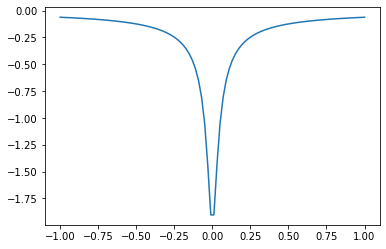

In [5]:
def f(x):
    # the function's interval must be [-1, 1]
    # return ((16 * x)**2 - 25)**2 / 4
    # return np.sin(np.pi * x)
    # return np.sin((np.pi * x)**2)
    # return np.sin(np.exp(-1 * x**2))
    # return np.sin(np.exp(-10 * x**2))
    # return np.sin(np.exp(-50 * x**2))
    # return np.sin(np.exp(-10 * x**2)) * np.sin((np.pi * x))
    # soft coulomb potential
    return -1 / np.sqrt((16 * x)**2 + 0.25)

xvec = np.linspace(-1, 1, 100)
ftru = f(xvec)
plt.plot(xvec, ftru)
plt.show()

In [18]:
n = 120

def theta(k):
    return (k - 0.5) * np.pi / (n + 1)

def g(k):
    return f(np.cos(theta(k)))

kvec = np.arange(1, n + 2)
print(kvec)
nvec = np.arange(0, n + 1)
print(nvec)

# compute Chebyshev coefficients
cvec = 2 / (n + 1) * np.sum(g(kvec) * np.cos(nvec[..., np.newaxis] * theta(kvec)), axis=1)

print(cvec.shape)
print(cvec)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
(121,)
[-3.86074

(121,)
(100,)


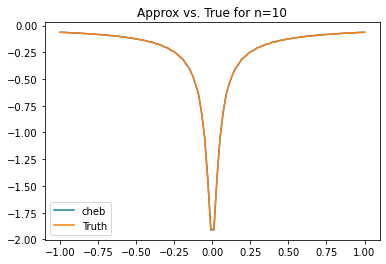

Error:  0.005173944077203343


In [19]:
T = sp.special.eval_chebyt(nvec, xvec[0])
print(T.shape)

# reconstruct function from Chebyshev coefficients
def cheb2x(x):
    rtn = np.zeros_like(x)
    for i in range(len(x)):
        chebvec = sp.special.eval_chebyt(nvec, x[i])
        chebvec[0] = chebvec[0] * 0.5
        chebvec[-1] = chebvec[-1] * 0.5
        rtn[i] = cvec @ chebvec
    return rtn

print(cheb2x(xvec).shape)

plt.plot(xvec, cheb2x(xvec), label='cheb')
plt.plot(xvec, ftru, label='Truth')
plt.title('Approx vs. True for n=10')
plt.legend()
plt.show()

def intgrd(x):
    chebvec = sp.special.eval_chebyt(nvec, x)
    chebvec[0] = chebvec[0] * 0.5
    chebvec[-1] = chebvec[-1] * 0.5
    fhat = cvec @ chebvec
    return (fhat - f(x))**2

print('Error: ', np.sqrt(sp.integrate.quad(intgrd, -1, 1, )[0]))

Error(n=2): 1.0738648842633216, Error(n=3): 0.5029973463892269, Error(n=4): 0.9382261288020267, Error(n=5): 0.4589072574073696, Error(n=6): 0.7769179806812996, Error(n=7): 0.42007557967228193, Error(n=8): 0.6514264939618826, Error(n=9): 0.3851743876083353, Error(n=10): 0.5543657362431885, Error(n=11): 0.35348742139934736, Error(n=12): 0.47766934389914084, Error(n=13): 0.3245630102703797, Error(n=14): 0.4157398708162731, Error(n=15): 0.298083793991538, Error(n=16): 0.3648061727383559, Error(n=17): 0.27380761988891866, Error(n=18): 0.3222751105894636, Error(n=19): 0.2515375001105371, Error(n=20): 0.2863122560012591, Error(n=21): 0.23110524106544136, Error(n=22): 0.25558367764475687, Error(n=23): 0.21236215021907626, Error(n=24): 0.2290951306591817, Error(n=25): 0.19517364578291735, Error(n=26): 0.2060893443015092, Error(n=27): 0.17941610253292908, Error(n=28): 0.18597857308654733, Error(n=29): 0.1649750007924157, Error(n=30): 0.16829910536655115, Error(n=31): 0.15174383285396442, Error(n

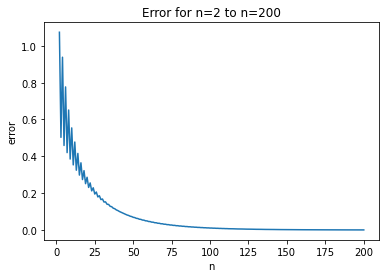

In [20]:
def errintgrd(x, nn):
    def ttheta(k):
        return (k - 0.5) * np.pi / (nn + 1)

    def gg(k):
        return f(np.cos(ttheta(k)))

    kkvec = np.arange(1, nn + 2)
    nnvec = np.arange(0, nn + 1)
    ccvec = 2 / (nn + 1) * np.sum(gg(kkvec) * np.cos(nnvec[..., np.newaxis] * ttheta(kkvec)), axis=1)

    chebsvec = sp.special.eval_chebyt(nnvec, x)
    chebsvec[0] = chebsvec[0] * 0.5
    chebsvec[-1] = chebsvec[-1] * 0.5

    ffhat = ccvec @ chebsvec
    return (ffhat - f(x))**2

error = []

stop = 200

for thisn in range(2, stop + 1):
    thiserror = np.sqrt(sp.integrate.quad(errintgrd, -1, 1, args=(thisn))[0])
    print(f'Error(n={thisn}):', thiserror, end=', ')
    error.append(thiserror)

plt.plot(range(2, stop + 1), error)
plt.xlabel('n')
plt.ylabel('error')
plt.title(f'Error for n=2 to n={stop}')
plt.show()